In [1]:
import os.path
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.modelbuilder.supervised  import SupervisedDataLoader 
from datatools.customtransformers import LogTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline 
np.set_printoptions(precision=4)

pd.set_option('display.width', 200)
pd.set_option('precision', 4)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")

In [2]:
load_app_config()
DIRECTORY="kaggle_housing"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'SalePrice'
LOGRESPONSE = 'LogSalePrice'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

Adding D:\DataSource  to system path
Adding D:\MachineLearning  to system path
D:\DataSource\kaggle_housing\train.csv
D:\DataSource\kaggle_housing\test.csv


In [3]:
#df_loader = DataFrameLoader(train_file, sep=',',header=0 ,encoding='utf8')
sm = SupervisedDataLoader(train_file=train_file,test_file=test_file,response =RESPONSE)
train_dataset ,test_dataset  = sm.train_dataset,sm.test_dataset
train_test = pd.concat([train_dataset,test_dataset],axis =0)

Loading train_file :D:\DataSource\kaggle_housing\train.csv
Loading test_file :D:\DataSource\kaggle_housing\test.csv


In [4]:
feature_count  = train_test.nunique(dropna=False)
constant_features = pd.DataFrame({'feature':feature_count.index,'count':feature_count.values})
print("constant features :{0},{1}".format(*constant_features.shape))
constant_features[constant_features['count']==1].head()

constant features :81,2


,feature,count


In [5]:
sm.describe_target()

count      1460.0000
mean     180921.1959
std       79442.5029
min       34900.0000
25%      129975.0000
50%      163000.0000
75%      214000.0000
max      755000.0000
Name: SalePrice, dtype: float64

In [6]:
set(train_dataset['Neighborhood'].values.tolist()) -set(test_dataset['Neighborhood'].values.tolist())
x=train_dataset['SalePrice'].describe().ravel() 
print(x)
y=train_dataset['SalePrice'].describe().index.values.tolist()
 
y

[  1460.     180921.1959  79442.5029  34900.     129975.     163000.
 214000.     755000.    ]


['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [7]:
all_neighborhood =train_dataset['Neighborhood'].values.tolist()
z = {}
for neighborhood in all_neighborhood:
    neighborhood_describe = train_dataset[train_dataset['Neighborhood'] == neighborhood]['SalePrice'].describe()
    z[neighborhood] =neighborhood_describe.ravel().tolist()



In [8]:
z= pd.DataFrame(z)
z=z.T 
z.columns  = y
#z.to_csv("neighborhood_describe.csv")
z

,count,mean,std,min,25%,50%,75%,max
CollgCr,150.0,197965.7733,51403.6664,110000.0,152958.75,197200.0,225725.00,424870.0
Veenker,11.0,238772.7273,72369.3180,162500.0,184250.00,218000.0,282000.00,385000.0
Crawfor,51.0,210624.7255,68866.3955,90350.0,159250.00,200624.0,239000.00,392500.0
NoRidge,41.0,335295.3171,121412.6586,190000.0,265000.00,301500.0,341000.00,755000.0
Mitchel,49.0,156270.1224,36486.6253,84500.0,131000.00,153500.0,171000.00,271000.0
Somerst,86.0,225379.8372,56177.5559,144152.0,177975.00,225500.0,252919.50,423000.0
NWAmes,73.0,189050.0685,37172.2181,82500.0,165150.00,182900.0,205000.00,299800.0
OldTown,113.0,128225.3009,52650.5832,37900.0,105900.00,119000.0,140000.00,475000.0
BrkSide,58.0,124834.0517,40348.6893,39300.0,100500.00,124300.0,141175.00,223500.0
Sawyer,74.0,136793.1351,22345.1292,62383.0,127250.00,135000.0,149462.50,190000.0


In [17]:
missing_df =train_dataset.isnull().sum().to_frame().reset_index()
missing_df = missing_df.rename(columns= {0: 'Count','index':'Feature'})
train_missing_df = missing_df[missing_df['Count']!=0]
train_missing_df['missing_percent'] =missing_df['Count']/train_dataset.shape[0]
train_missing_df.sort_values(by=['missing_percent'])

,Feature,Count,missing_percent
42,Electrical,1,0.0007
25,MasVnrType,8,0.0055
26,MasVnrArea,8,0.0055
30,BsmtQual,37,0.0253
31,BsmtCond,37,0.0253
33,BsmtFinType1,37,0.0253
32,BsmtExposure,38,0.0260
35,BsmtFinType2,38,0.0260
64,GarageCond,81,0.0555
63,GarageQual,81,0.0555


In [10]:
Checkpoint

NameError: name 'Checkpoint' is not defined

In [18]:
missing_df =test_dataset.isnull().sum().to_frame().reset_index()
missing_df = missing_df.rename(columns= {0: 'Count','index':'Feature'})
test_missing_df= missing_df[missing_df['Count']!=0]
test_missing_df['missing_percent'] =missing_df['Count']/test_dataset.shape[0]
test_missing_df.sort_values(['missing_percent'])

,Feature,Count,missing_percent
38,TotalBsmtSF,1,0.0007
62,GarageArea,1,0.0007
61,GarageCars,1,0.0007
53,KitchenQual,1,0.0007
37,BsmtUnfSF,1,0.0007
36,BsmtFinSF2,1,0.0007
34,BsmtFinSF1,1,0.0007
78,SaleType,1,0.0007
23,Exterior1st,1,0.0007
24,Exterior2nd,1,0.0007


skewness of response: 1.8828757597682129
kurtosis of response: 6.536281860064529


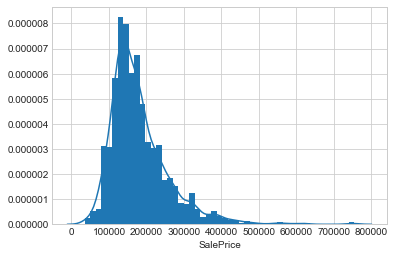

In [13]:
tgt_plot = sm.get_target_plot(continuous=True)
tgt_plot.show()

skewness of response: 0.12134661989685333
kurtosis of response: 0.809519155707878


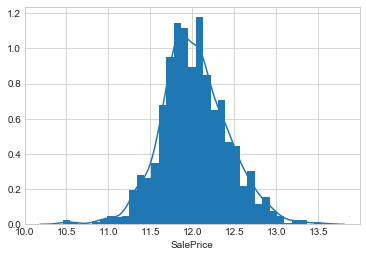

In [14]:
tgt_plot = sm.get_target_plot(continuous=True,convert_log = True)
tgt_plot.show()

In [15]:
continuous_features ,categorical_features  = sm.get_feature_groups(train_dataset)

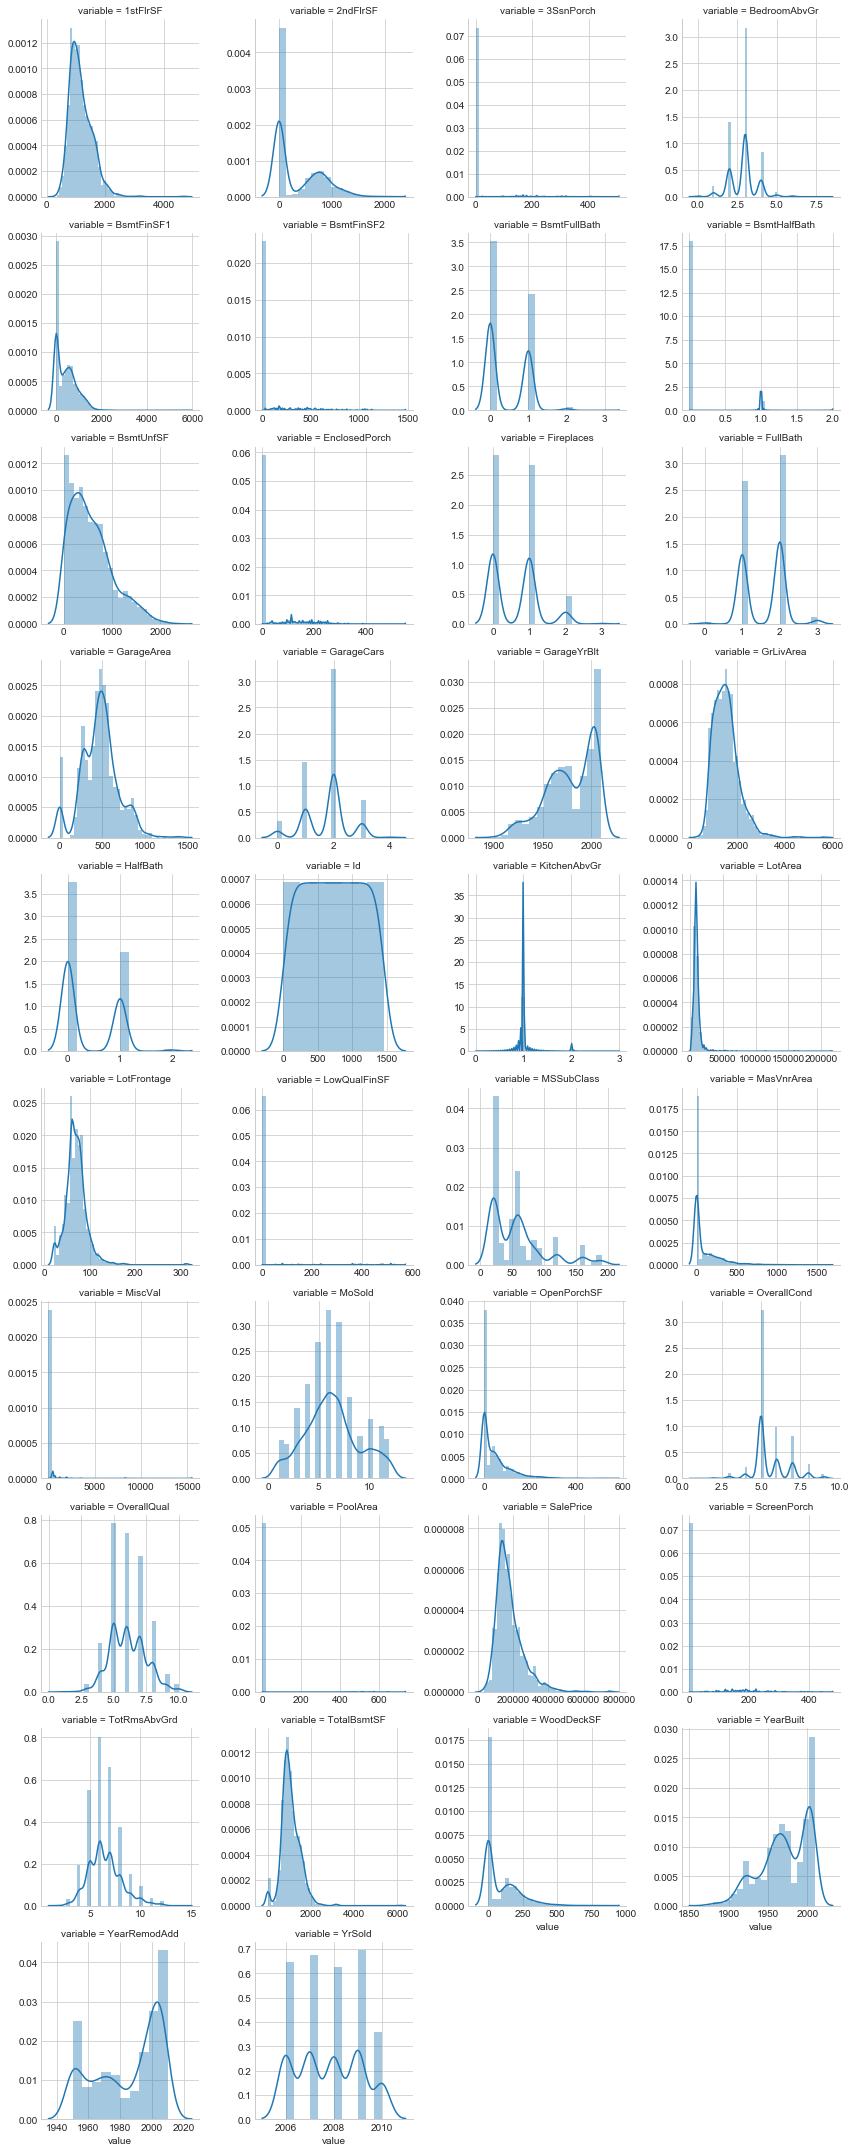

In [16]:
# Grid of distribution plots of all numerical features
f = pd.melt(train_dataset, value_vars=sorted(continuous_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [19]:
 train_dataset[['MSSubClass','MoSold','YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
MSSubClass    1460 non-null int64
MoSold        1460 non-null int64
YrSold        1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


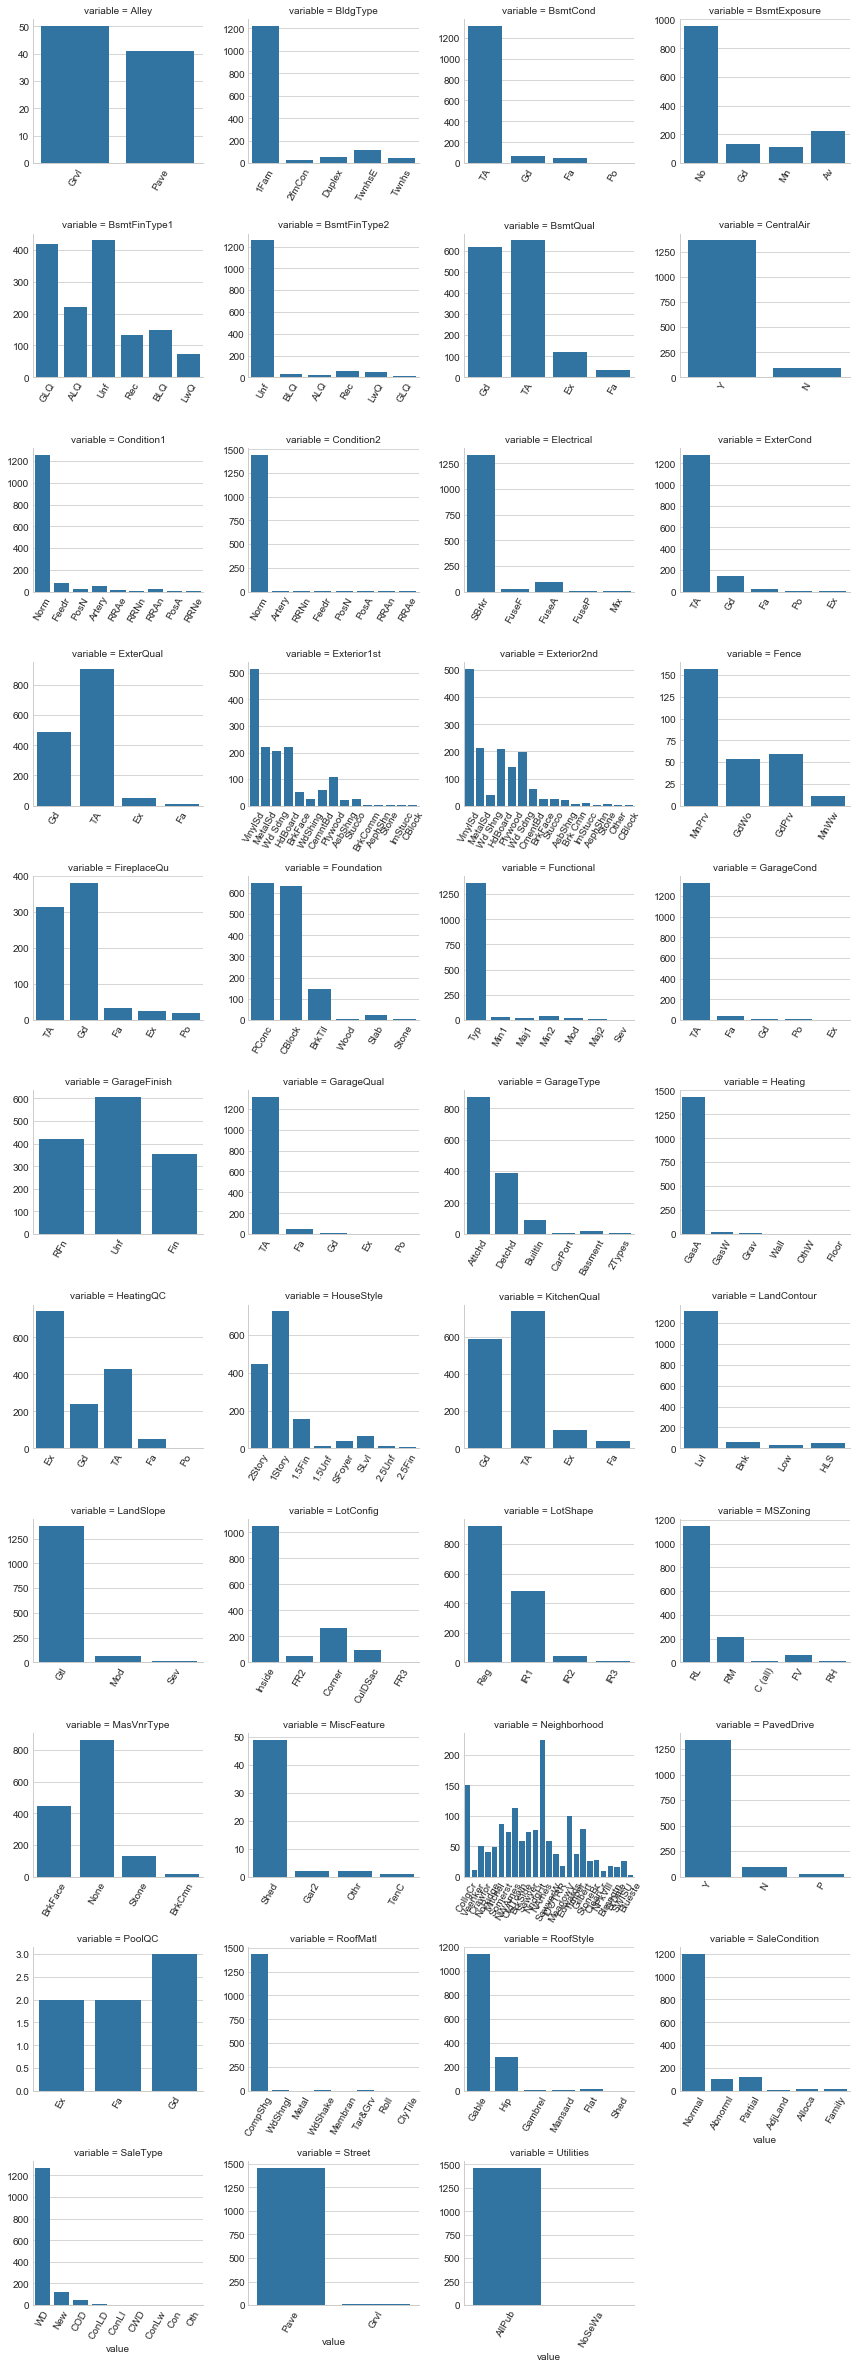

In [20]:
f = pd.melt(train_dataset, value_vars=sorted(categorical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [21]:
train_dataset["TotBath"] = train_dataset["FullBath"] + 0.5*train_dataset["HalfBath"] + train_dataset["BsmtFullBath"] + 0.5*train_dataset["BsmtHalfBath"]
train_dataset["TotArea"] = train_dataset["GrLivArea"] + train_dataset["TotalBsmtSF"]
train_dataset['TotalFloorSF'] = train_dataset['1stFlrSF'] + train_dataset['2ndFlrSF']
train_dataset.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","1stFlrSF","2ndFlrSF"],axis=1,inplace=True)

test_dataset["TotBath"] = test_dataset["FullBath"] + 0.5*test_dataset["HalfBath"] + test_dataset["BsmtFullBath"] + 0.5*test_dataset["BsmtHalfBath"]
test_dataset["TotArea"] = test_dataset["GrLivArea"] + test_dataset["TotalBsmtSF"]
test_dataset['TotalFloorSF'] = test_dataset['1stFlrSF'] + test_dataset['2ndFlrSF']
test_dataset.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","1stFlrSF","2ndFlrSF"],axis=1,inplace=True)

In [22]:
continuous_features ,categorical_features  = sm.get_feature_groups(train_dataset)
count_features = ['TotBath','BedroomAbvGr','KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars']
ordinal_features = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageYrBlt','MSSubClass','MoSold','YrSold']
non_count_features = [f for f in continuous_features if f not in count_features + ordinal_features+ ['Id','SalePrice']]
non_count_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotArea',
 'TotalFloorSF']

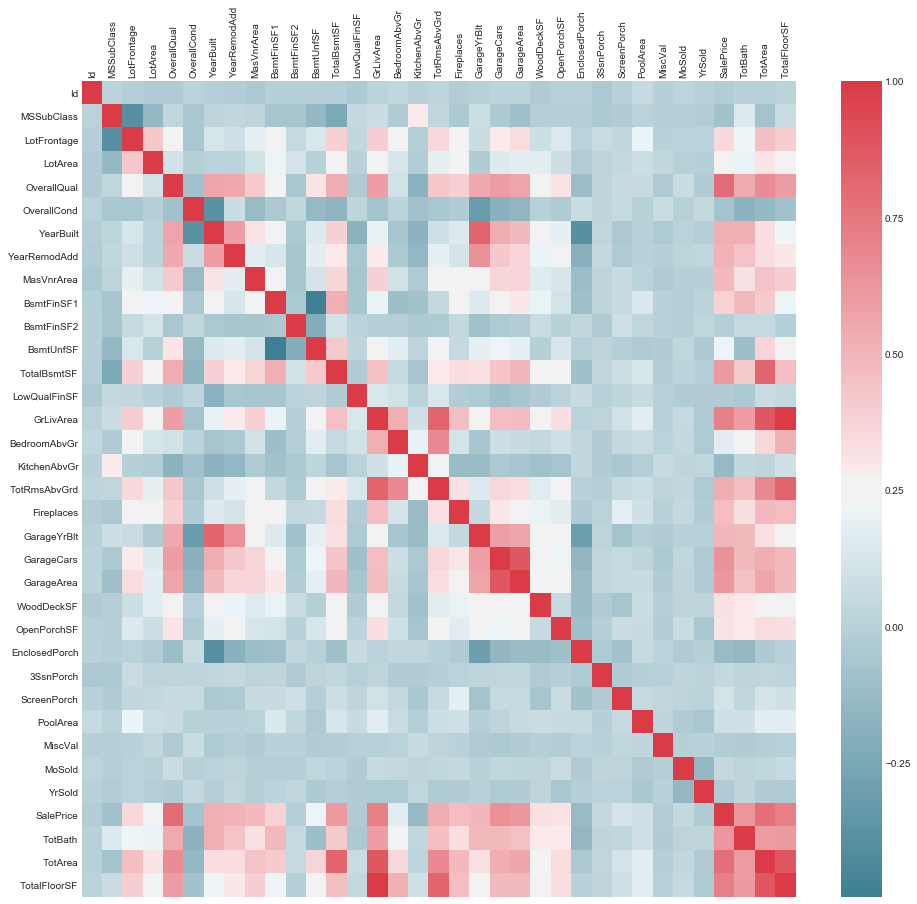

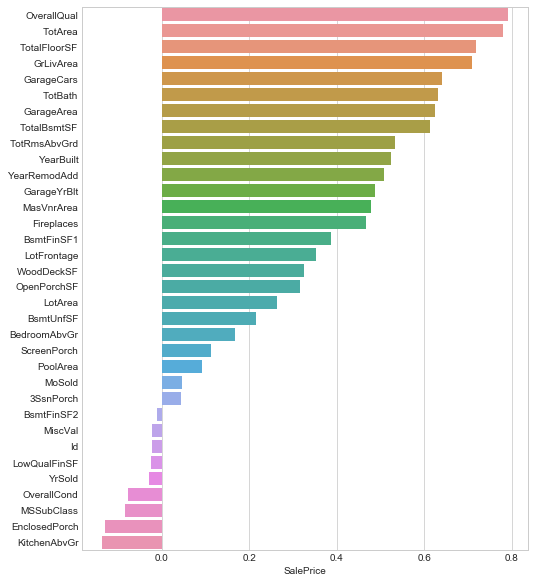

In [23]:
correlation = train_dataset[continuous_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, 
           xticklabels=correlation.columns.values,
           yticklabels=correlation.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

correlation = correlation.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( correlation['SalePrice'][1:], correlation.index[1:], orient='h')
plt.show()

In [24]:
log_transformer = LogTransformer(non_count_features)
train_dataset = log_transformer.fit_transform(train_dataset)
test_dataset  = log_transformer.fit_transform(test_dataset)

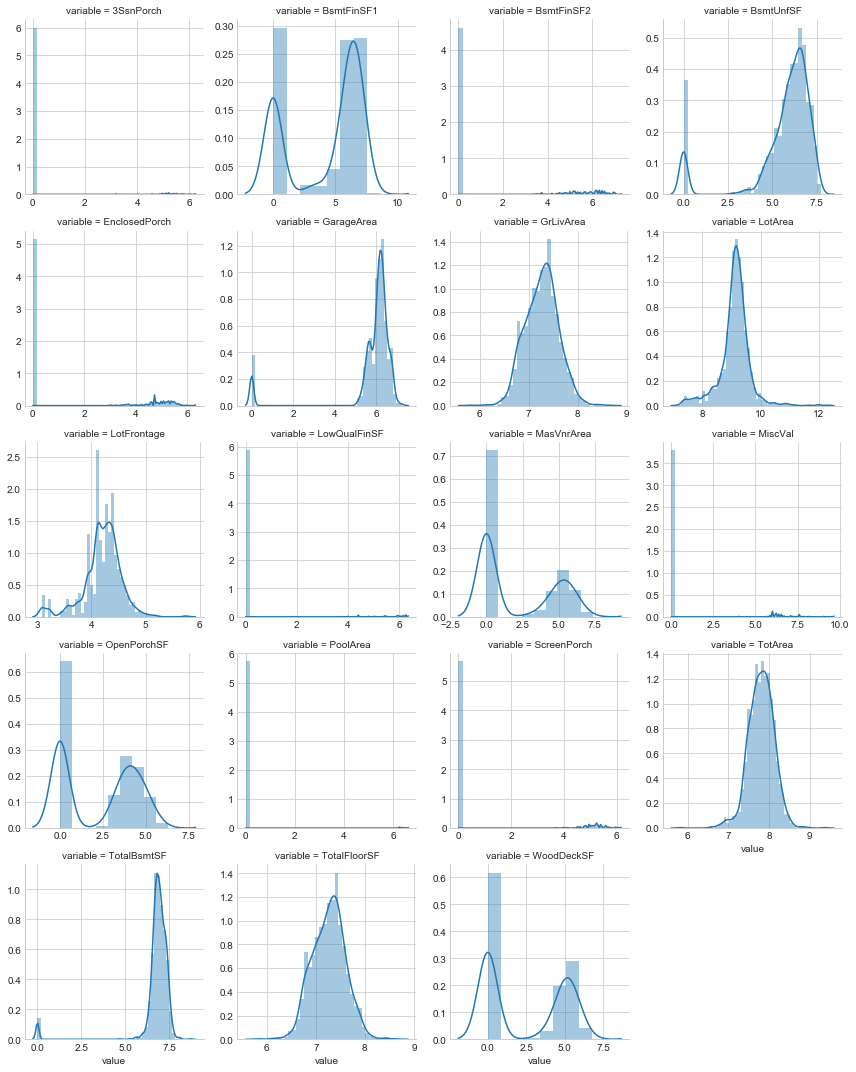

In [25]:
f = pd.melt(train_dataset, value_vars=sorted(non_count_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [26]:
lm_train = train_dataset[non_count_features] 
lm_train[LOGRESPONSE]= np.log1p(train_dataset[RESPONSE])
cols  = train_dataset[non_count_features].shape[1]

No of  columns: 19


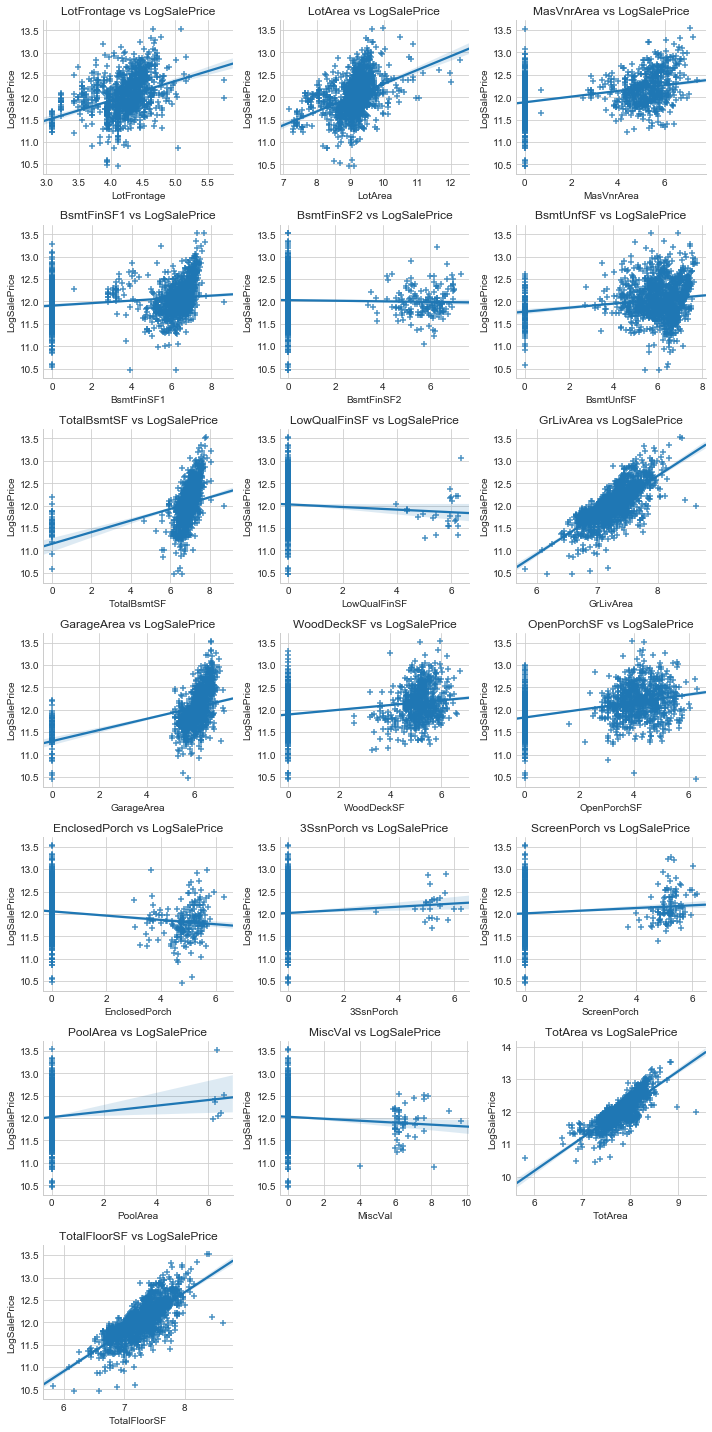

In [27]:
print("No of  columns: {0}".format(cols))

def plot_dataset(dataset,features ,response_column,log=False):
    fig = plt.figure(figsize=(10,20))

   
    for subplot_index ,i in enumerate(range(0,len(features))):
        if(features[i] != response_column ):
            ax = fig.add_subplot(7, 3,  subplot_index + 1)
            if log:
                ax.set(xscale="log",yscale ="log")
            #ax.scatter(X.iloc[:,i],np.log1p(y),marker=".")
            sns.regplot(x=features[i],y= response_column , marker="+", data = dataset,ax=ax)
            sns.despine()
            ax.set_title("{0} vs {1}".format(features[i],response_column))
            plt.tight_layout()
 
    plt.show()
    
plot_dataset(lm_train,non_count_features,LOGRESPONSE)

In [28]:
train_dataset[1000:1005]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotBath,TotArea,TotalFloorSF
1000,1001,20,RL,4.3175,9.2308,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1952,1952,Flat,Tar&Grv,BrkComm,Brk Cmn,None,0.0000,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0000,NaN,0.0,0.0000,0.0000,GasW,Fa,N,FuseF,0.0,6.8512,2,1,Fa,4,Min1,0,NaN,Detchd,1956.0,Unf,2,6.2710,TA,Fa,Y,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7,2009,WD,Normal,82000,1.0,6.8512,6.8512
1001,1002,30,RL,4.1109,8.5943,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0000,TA,TA,BrkTil,Fa,TA,No,Unf,0.0000,Unf,0.0,6.5396,6.5396,GasA,Ex,Y,FuseA,0.0,6.5396,2,1,Ex,4,Typ,0,NaN,Detchd,1920.0,Unf,1,5.3799,Fa,TA,N,0.0000,3.0445,4.5539,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,2007,WD,Abnorml,86000,1.0,7.2320,6.5396
1002,1003,20,RL,4.3307,9.3892,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.9890,Gd,TA,PConc,Gd,TA,No,GLQ,3.2189,Unf,0.0,7.3467,7.3620,GasA,Ex,Y,SBrkr,0.0,7.3620,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,6.7154,TA,TA,Y,4.9767,4.6540,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7,2008,WD,Normal,232000,2.0,8.0548,7.3620
1003,1004,90,RL,NaN,9.3502,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.1059,TA,TA,CBlock,TA,TA,No,Unf,0.0000,Unf,0.0,7.4271,7.4271,GasA,Fa,Y,SBrkr,0.0,7.4271,4,2,TA,8,Typ,0,NaN,Detchd,1976.0,Unf,2,6.2710,TA,TA,Y,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6,2007,WD,Normal,136905,2.0,8.1200,7.4271
1004,1005,120,RL,3.7842,8.0656,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,2.8332,Gd,TA,PConc,Gd,TA,No,GLQ,2.8332,Unf,0.0,7.1937,7.2056,GasA,Ex,Y,SBrkr,0.0,7.3165,1,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,6.1269,TA,TA,Y,5.0562,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5,2009,WD,Normal,181000,2.0,7.9554,7.3165


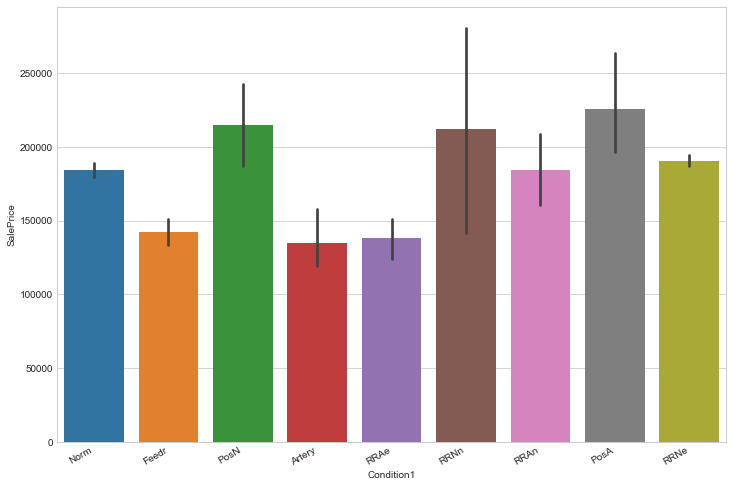

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.barplot(y="SalePrice", x="Condition1", data=train_dataset,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [30]:
neigbourhood_saleprice =train_dataset.groupby('Neighborhood').agg({'SalePrice':'median'}).reset_index()
neigbourhood_saleprice = pd.DataFrame(neigbourhood_saleprice).sort_values(by=['SalePrice'])
neigbourhood_saleprice
 

,Neighborhood,SalePrice
10,MeadowV,88000
9,IDOTRR,103000
2,BrDale,106000
17,OldTown,119000
7,Edwards,121750
3,BrkSide,124300
19,Sawyer,135000
1,Blueste,137500
18,SWISU,139500
12,NAmes,140000


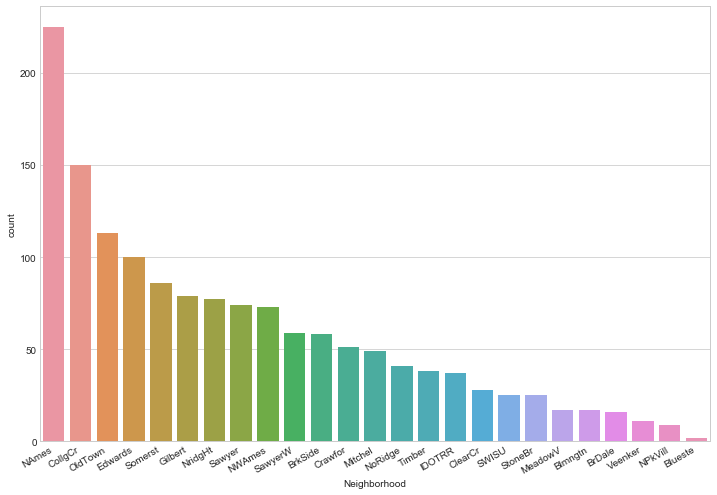

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.countplot(x="Neighborhood", data=train_dataset,ax=ax,order=train_dataset['Neighborhood'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

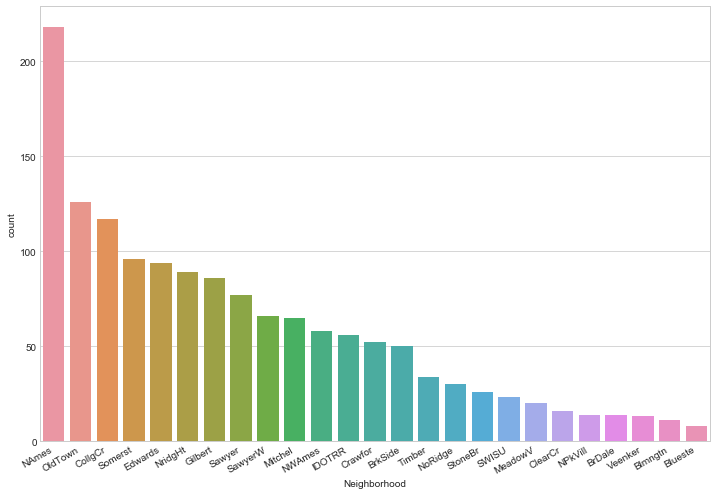

In [32]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.countplot(x="Neighborhood", data=test_dataset,ax=ax,order=test_dataset['Neighborhood'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()